In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/biovic/machinelearning-zoo

Cloning into 'machinelearning-zoo'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [ ]:
!ls machinelearning-zoo

classification.csv  src  zoo.csv


In [ ]:
#csv of animals
data_csv= pd.read_csv("machinelearning-zoo/zoo.csv")
data_csv.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
#csv of classificaiton
class_csv= pd.read_csv("machinelearning-zoo/classification.csv")
class_csv.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [ ]:
#joining class of animals and their categories
csv_category= pd.merge(data_csv, class_csv, how='left',left_on='class_type',right_on='Class_Number')
csv_category.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


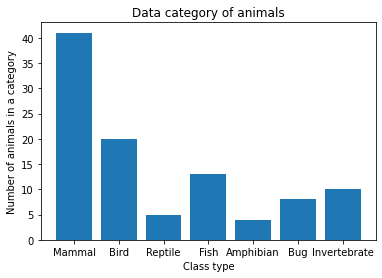

In [ ]:
num_of_classes= len(class_csv)
# print(num_of_classes)

num_of_animals= len(data_csv)
# print(num_of_animals)

# print(class_csv['Number_Of_Animal_Species_In_Class'])
plt.figure(figsize=(6, 4))
plt.bar(class_csv['Class_Type'], class_csv['Number_Of_Animal_Species_In_Class'])
plt.title("Data category of animals")
plt.xlabel("Class type")
plt.ylabel("Number of animals in a category")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from keras.utils.np_utils import to_categorical

#see column
num_of_chars=17
X=csv_category.iloc[:,1:num_of_chars] #to obtain the input from hair to catsize 
y=csv_category.iloc[:,num_of_chars+1]   #to obtain the output by deciding which category the animal is [17 or 18]
print(X,y)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

# y_train= to_categorical(y_train,num_of_chars)
# y_train.reshape()
# y_test= np.ravel(y_test)
# X_train=np.asarray(X_train)
# y_train=np.asarray(y_train)
# X_test=np.asarray(X_test)
# y_test=np.asarray(y_test)

print(X_train.shape)
print(y_train.shape)

Using TensorFlow backend.


     hair  feathers  eggs  milk  airborne  ...  fins  legs  tail  domestic  catsize
0       1         0     0     1         0  ...     0     4     0         0        1
1       1         0     0     1         0  ...     0     4     1         0        1
2       0         0     1     0         0  ...     1     0     1         0        0
3       1         0     0     1         0  ...     0     4     0         0        1
4       1         0     0     1         0  ...     0     4     1         0        1
..    ...       ...   ...   ...       ...  ...   ...   ...   ...       ...      ...
96      1         0     0     1         0  ...     0     2     1         0        1
97      1         0     1     0         1  ...     0     6     0         0        0
98      1         0     0     1         0  ...     0     4     1         0        1
99      0         0     1     0         0  ...     0     0     0         0        0
100     0         1     1     0         1  ...     0     2     1         0  

In [ ]:
# import keras
# from keras.utils.np_utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

all_score=[]
cv_scores=[]

#The model of SVM
model = SVC(kernel='linear', C=0.2, random_state=0)

#Training the model
model.fit(X_train,y_train)
y_result = model.predict(X_test)

#Error evaluation
score = accuracy_score(y_result, y_test)  #find the difference result between prediction and the truth
all_score.append(score)

print(all_score)
#Cross validation score
cross_validation= cross_val_score(model, X,y, cv=10)
print("SVM accuracy:  %0.3f (+/- %0.3f)" %(cross_validation.mean(), cross_validation.std()*2) )
result_cv_score= cross_validation.mean()
cv_scores.append(result_cv_score)

[0.8571428571428571]
SVM accuracy:  0.960 (+/- 0.098)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


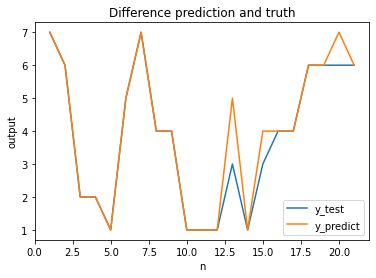

In [ ]:
n=[]
for i in range (len(y_test)):
  n.append(i+1)

plt.plot(n, y_test)
plt.plot(n, y_result)
plt.title("Difference prediction and truth")
plt.xlabel("n")
plt.ylabel("output")
plt.legend(["y_test","y_predict"])
plt.show()


In [ ]:
#USING Xgboost machine learning
# !pip install xgboost
from xgboost import XGBClassifier

all_score=[]
cv_scores=[]
model =  XGBClassifier()
model.fit(X_train, y_train)

#predict y
y_predict= model.predict(X_test)

#error evaluation
accuracy= accuracy_score(y_test, y_predict)
all_score.append(accuracy)

print(all_score)
#Cross validation score
cross_validation= cross_val_score(model, X,y, cv=10)
print("XGB accuracy:  %0.3f (+/- %0.3f)" %(cross_validation.mean(), cross_validation.std()*2) )
result_cv_score= cross_validation.mean()
cv_scores.append(result_cv_score)

[0.9047619047619048]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


XGB accuracy:  0.950 (+/- 0.134)


In [ ]:
# #using ensemble method (Gradient Boosting)
# from sklearn import model_selection
# from sklearn.ensemble import GradientBoostingClassifier
# kfold = model_selection.KFold(n_splits=10, random_state=17)
# model = GradientBoostingClassifier(n_estimators=100, random_state=17)
# results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
# print(results.mean())

In [ ]:
#using random forest
all_scores=[]
eval_scores=[]

from sklearn.ensemble import RandomForestClassifier

#Modelling 
model = RandomForestClassifier(random_state=0, n_estimators=25, n_jobs=2)
model.fit(X_train, y_train)

y_prediction= model.predict(X_test)

#Scoring system
score = accuracy_score(y_prediction,y_test)
all_scores.append(score)

#cross_validation score
cross_validation= cross_val_score(model, X,y, cv=10)
print("RF accuracy:  %0.3f (+/- %0.3f)" %(cross_validation.mean(), cross_validation.std()*2) )
result_cv_score= cross_validation.mean()
eval_scores.append(result_cv_score)

NameError: ignored

In [ ]:
import numpy as np
dict_change={"7":"Un obj","8":"Clear","9":"O less","16":"BDL","25":"Nil","26":"Nil"}
sesuatu=list(dict_change.keys())
hasil= list(dict_change.values())
print(hasil[0])

Un obj
